### Alumno: Fernando Ortega Camargo
### No. estudiante 323018993
### Correo: fernando.ortega1899@alumnos.udg.mx
### Fecha: 10 / 11 / 2023

# Challenge de Fin de Curso: "Python Data Journey"


### Descripción del Challenge  
El Gran Analizador de Texto Python (GATPy):  
Crearás un script de Python denominado GATPy. Este script leerá un archivo de texto provisto por el usuario (por ejemplo, un libro de dominio público de Project Gutenberg). Luego, calculará y presentará lo siguiente:  
La frecuencia de cada palabra en el texto.  
Las 5 palabras más comunes y su conteo.  
La cantidad de palabras únicas en el documento.  
Opcional: Una nube de palabras generada a partir del texto.  
Además, el script generará un archivo de salida .txt con los resultados del análisis y una visualización simple si optas por la funcionalidad opcional.  


Entrega  
El plazo de entrega será de dos semanas a partir de la fecha de lanzamiento del desafío. Todo el trabajo debe ser subido a tu repositorio de GitHub antes de la fecha y hora límite. Asegúrate de seguir las mejores prácticas de codificación y mantener tu repositorio público para que pueda ser revisado por los instructores.
¡Buena suerte y que comience la codificación!


In [1]:
import os
os.chdir("D://Maestria//1sem\Materias//Programacion1\programacion_1\Challenge")   #Definimos ruta donde estará el txt

In [3]:
# Definición de la función GATPy que realiza análisis de texto y genera gráficos y estadísticas
def GATPy(name):
    # Importación de bibliotecas necesarias
    import nltk
    import re as re
    import warnings
    import matplotlib.pyplot as plt
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from wordcloud import WordCloud
    warnings.filterwarnings("ignore")

    # Lectura del archivo de texto
    archivo = open(name + ".txt", encoding="utf-8").read()

    # Tokenización del texto
    tokens = word_tokenize(archivo)
    
    # Filtrado de tokens para quedarse solo con palabras alfanuméricas
    tokens = [word.lower() for word in tokens if word.isalpha()]

    # Estadísticas generales del texto
    total = "Total de palabras " + str(len(tokens))
    unicas = "Total de palabras únicas " + str(len(list(set(tokens))))

    # Frecuencia de palabras
    frecuencia = nltk.FreqDist(tokens)
    frecuencia2 = dict(sorted(dict(nltk.FreqDist(tokens)).items(), key=lambda item: item[1], reverse=True))
    frecuencia_final = list(dict(frecuencia2).items())
    
    diccionario_ordenado = dict(sorted(frecuencia.items(), key=lambda item: item[1], reverse=True))
    
    # Top 5 palabras más repetidas
    top = list(dict(diccionario_ordenado).items())[:5]

    # Visualización de Tokens
    plt.title(f"Frecuencia por palabras del texto {name}")
    grafico1 = frecuencia.plot(30, cumulative=False)
    plt.show()

    # Generación de Wordcloud quitando stopwords
    clean_tokens2 = tokens[:]
    clean_stop = [x for x in clean_tokens2 if x not in stopwords.words('spanish')]

    wordcloud = WordCloud().generate(" ".join(clean_stop))
    
    plt.figure(figsize=(15, 10))
    plt.title(f"Nube de palabras del texto {name}", fontsize=20)
    grafico2 = plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    # Escritura de estadísticas en un archivo
    with open("estadisticosFinal.txt", "w") as estad:
        estad.write(f"ESTADÍSTICOS GENERALES DEL TEXTO: {name}\n\n")
        estad.write(str(total) + ":\n\n")
        estad.write(str(unicas) + ":\n\n")
        estad.write("TOP 5 palabras más repetidas\n\n")

        for i in top:
            estad.write("%s: %s\n" % (str(i[0]), str(i[1])))

        estad.write("\nFrecuencia Total de palabras\n\n")
        
        for j in frecuencia_final:
            estad.write("%s: %s\n" % (str(j[0]), str(j[1])))
    
    # Devolución de los gráficos generados
    return grafico1, grafico2

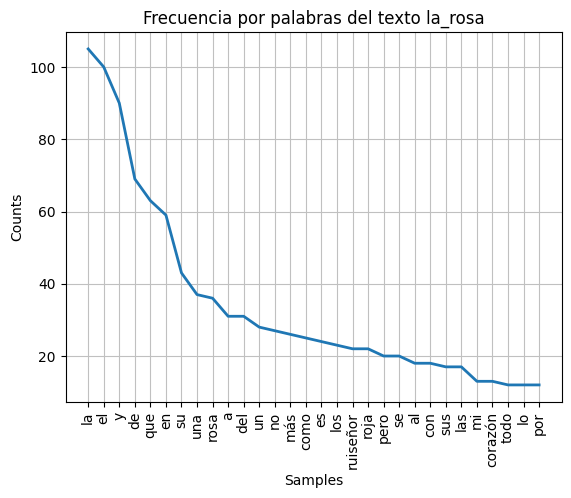

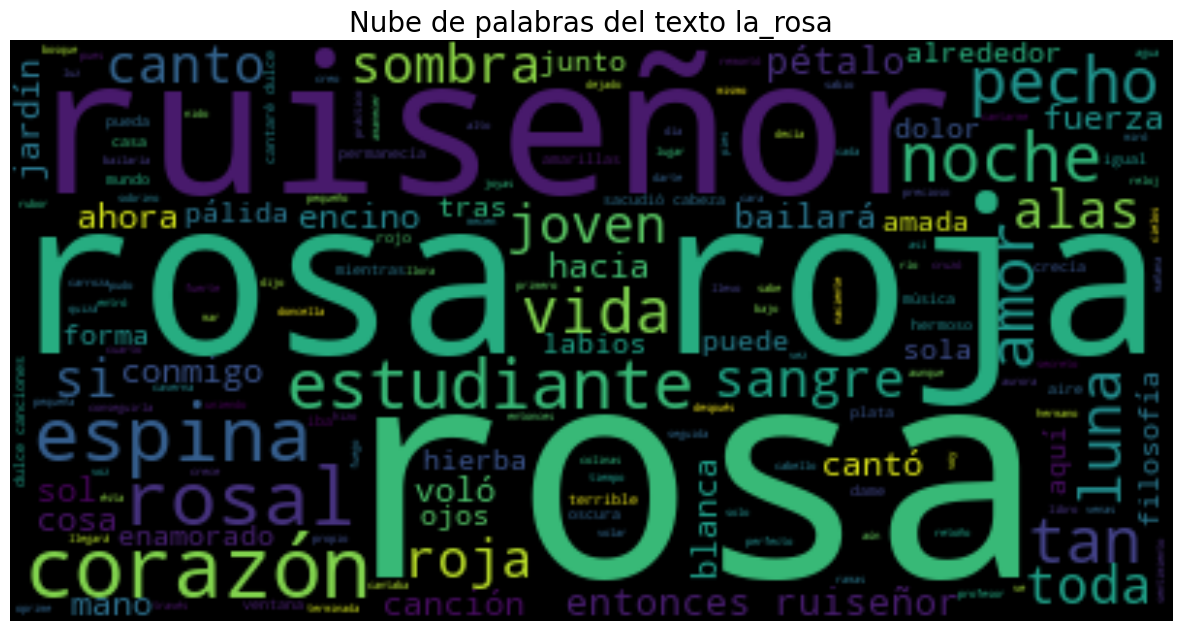

(<Axes: title={'center': 'Frecuencia por palabras del texto la_rosa'}, xlabel='Samples', ylabel='Counts'>,
 <matplotlib.image.AxesImage at 0x106c6ba2c40>)

In [6]:
GATPy("la_rosa")